Подключим необходимые библиотеки:

In [54]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

Считаем данные:

In [55]:
PATH = '../input/events/security_ecents.xlsx'
df = pd.read_excel(PATH)


df.columns = ['Type', 'Time', 'Source', 'Event_id', 'Category']

Выведем начало считанной таблицы:

In [56]:
df.head()

,Type,Time,Source,Event_id,Category
0,Аудит успеха,2024-11-16 21:32:38,Microsoft Windows security auditing.,4624,Logon
1,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management
2,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management
3,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management
4,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11372 entries, 0 to 11371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Type      11372 non-null  object        
 1   Time      11372 non-null  datetime64[ns]
 2   Source    11372 non-null  object        
 3   Event_id  11372 non-null  int64         
 4   Category  11372 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 444.3+ KB


Сгруппируем объекты по часам:

In [58]:
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour

# Create hour columns
event_counts = df['hour'].value_counts().sort_index()
df['event_count'] = df['hour'].map(event_counts)

Проверим результат:

In [59]:
df.head()

,Type,Time,Source,Event_id,Category,hour,event_count
0,Аудит успеха,2024-11-16 21:32:38,Microsoft Windows security auditing.,4624,Logon,21,1086
1,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management,21,1086
2,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management,21,1086
3,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management,21,1086
4,Аудит успеха,2024-11-16 21:31:04,Microsoft Windows security auditing.,5379,User Account Management,21,1086


Построим гистограмму общего количества событий в час:

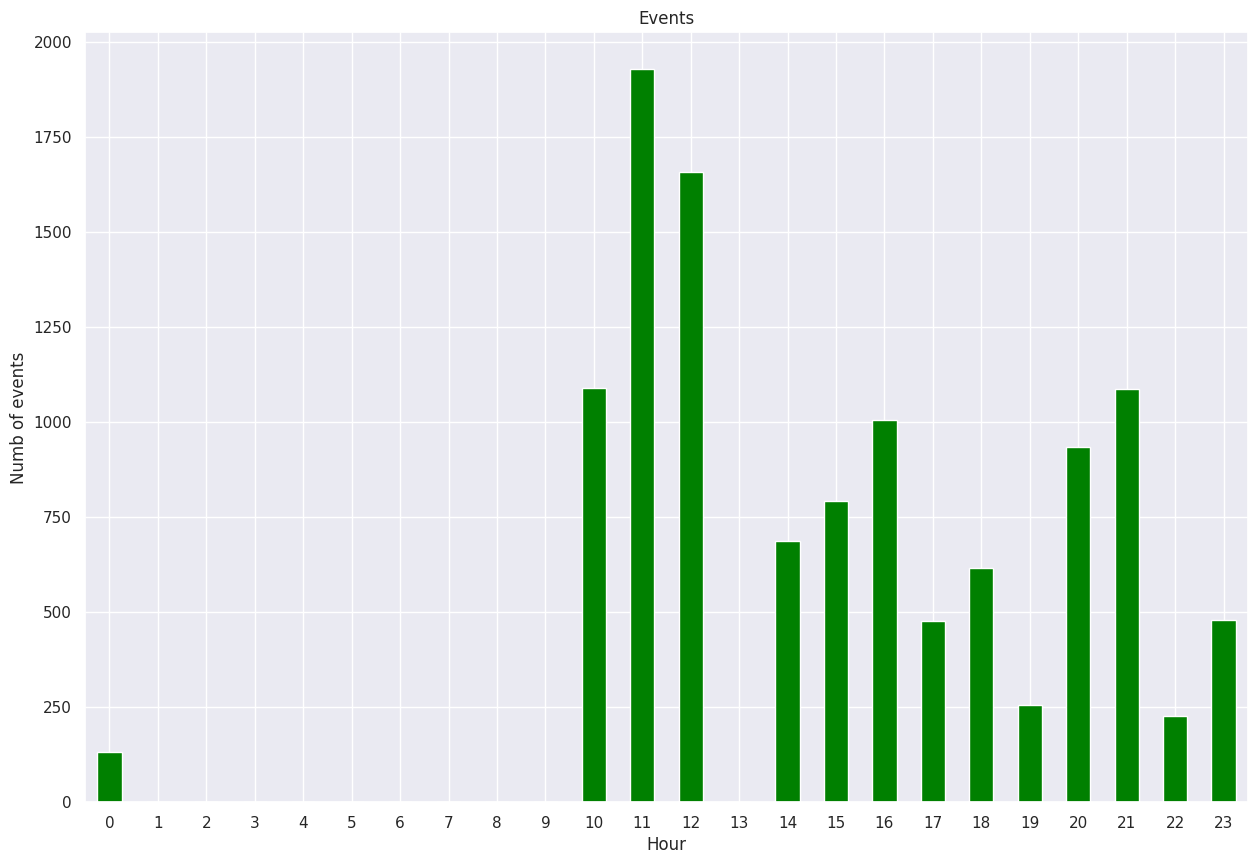

In [60]:
# Hours indexes
hours_index = pd.Index(range(24))

event_counts = event_counts.reindex(hours_index, fill_value=0)

plt.figure(figsize=(15, 10))
event_counts.plot(kind='bar', color='green')

plt.title('Events')
plt.xlabel('Hour')
plt.ylabel('Numb of events')
plt.xticks(rotation=0)
plt.grid

plt.show()

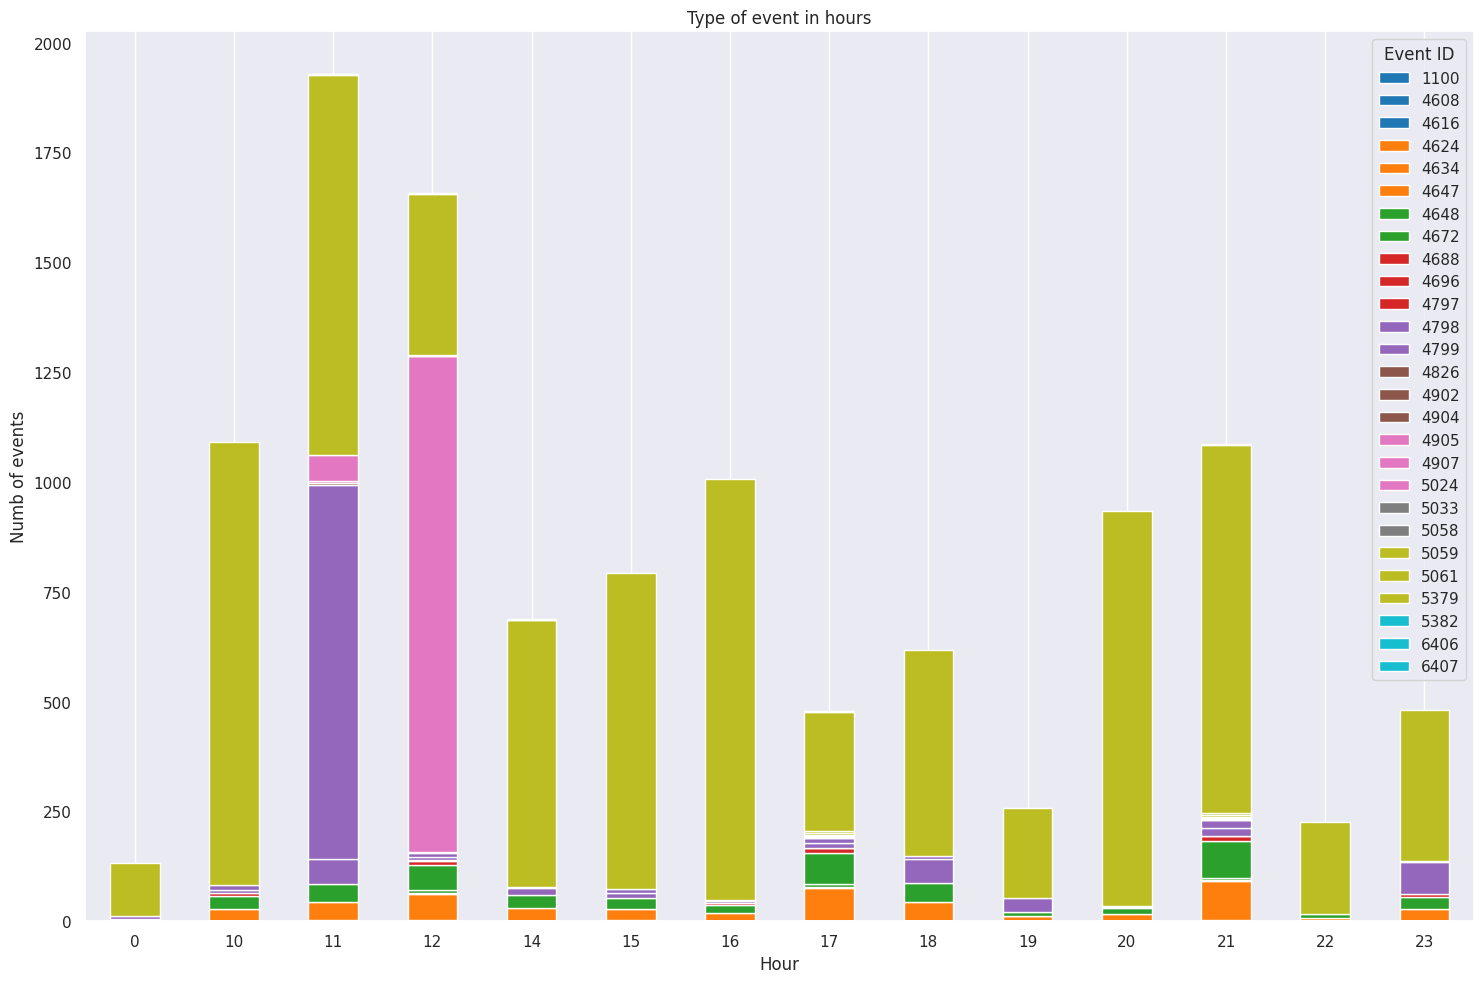

In [61]:
event_count_by_hour = df.groupby(['hour', 'Event_id']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))
event_count_by_hour.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())

plt.title('Type of event in hours')
plt.xlabel('Hour')
plt.ylabel('Numb of events')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.legend(title='Event ID')

plt.tight_layout()
plt.show()

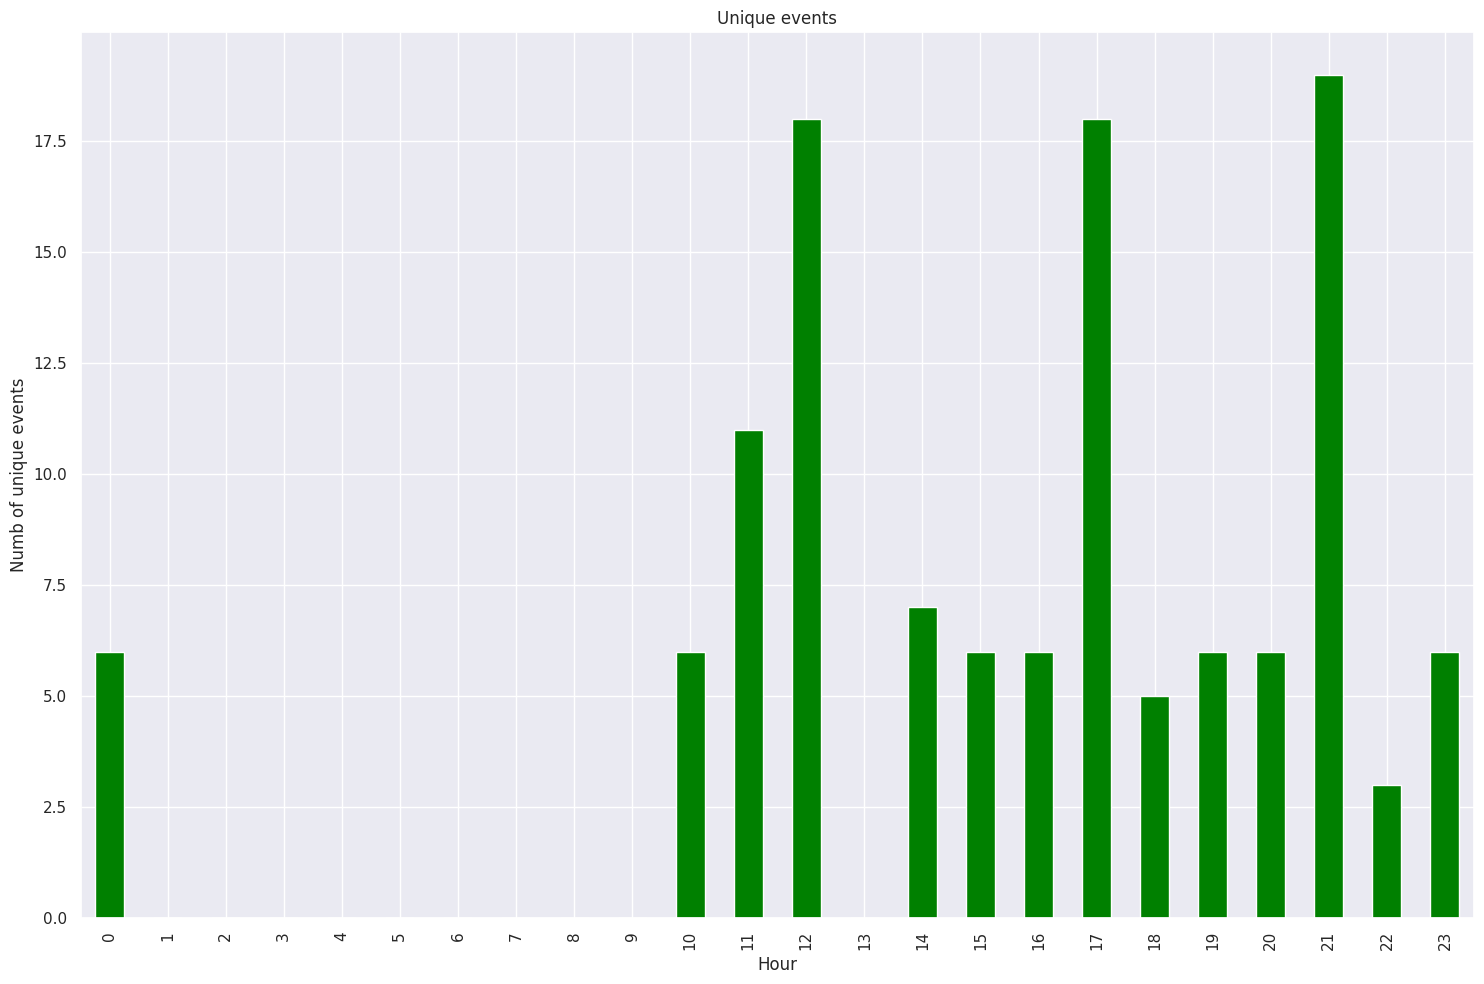

In [62]:
unique_event_count_by_hour = df.groupby('hour')['Event_id'].nunique()
unique_event_count_by_hour = unique_event_count_by_hour.reindex(hours_index, fill_value=0)

plt.figure(figsize=(15, 10))
unique_event_count_by_hour.plot(kind='bar', color='green')

plt.title('Unique events')
plt.xlabel('Hour')
plt.ylabel('Numb of unique events')
plt.grid

plt.tight_layout()
plt.show()